# MA(1) + MA(2)

C:\Users\bzenz\AppData\Local\Temp\ipykernel_21820\2555587717.py:58: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs1[i].stem(x, use_line_collection=True)
C:\Users\bzenz\AppData\Local\Temp\ipykernel_21820\2555587717.py:69: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs2[i].stem(x, use_line_collection=True)


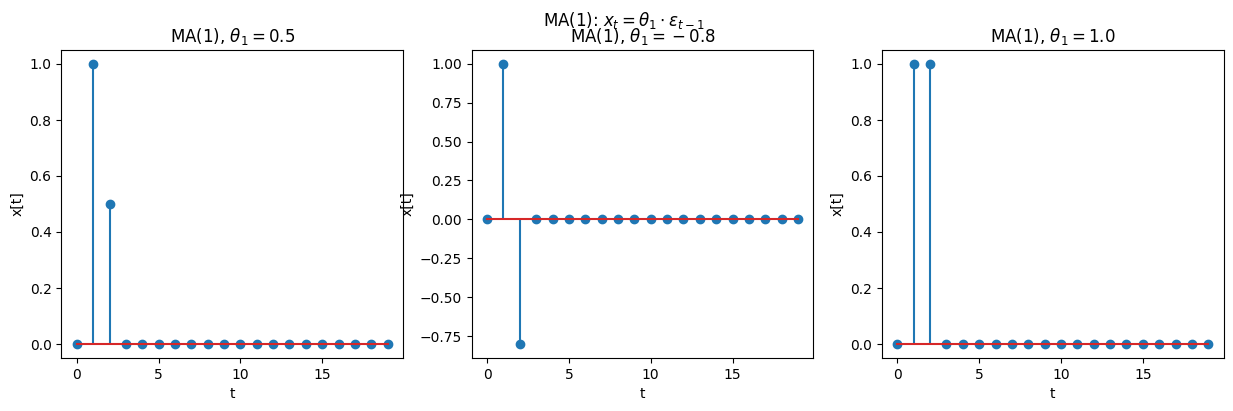

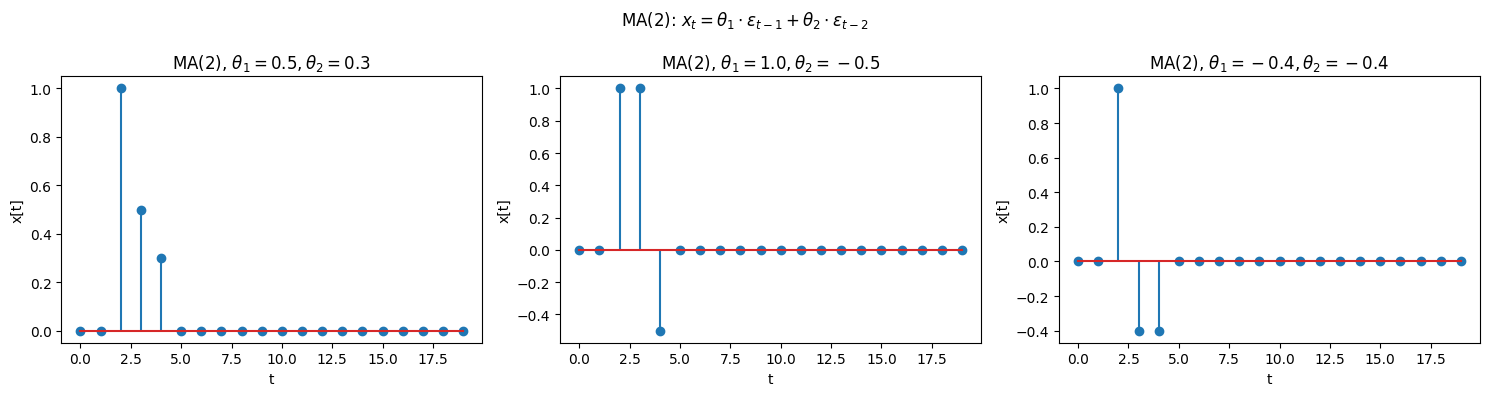

In [2]:
# Imports nach Reset
import numpy as np
import matplotlib.pyplot as plt

# MA(1) ohne Rauschen: x_t = θ * ε_{t-1}, mit fester ε (z. B. Impuls bei t=1)
def generate_ma1(length, theta, impulse_index=1):
    epsilon = np.zeros(length)
    if impulse_index < length:
        epsilon[impulse_index] = 1  # Impuls an Position impulse_index
    x = np.zeros(length)
    for t in range(1, length):
        x[t] = epsilon[t] + theta * epsilon[t - 1]
    return x

# MA(2) ohne Rauschen: x_t = θ1 * ε_{t-1} + θ2 * ε_{t-2}
def generate_ma2(length, theta1, theta2, impulse_index=2):
    epsilon = np.zeros(length)
    if impulse_index < length:
        epsilon[impulse_index] = 1
    x = np.zeros(length)
    for t in range(2, length):
        x[t] = epsilon[t] + theta1 * epsilon[t - 1] + theta2 * epsilon[t - 2]
    return x

# MA(1) mit Rauschen
def generate_ma1_noise(length, theta, sigma=1.0):
    epsilon = np.random.normal(0, sigma, size=length)
    x = np.zeros(length)
    for t in range(1, length):
        x[t] = epsilon[t] + theta * epsilon[t - 1]
    return x

# MA(2) mit Rauschen
def generate_ma2_noise(length, theta1, theta2, sigma=1.0):
    epsilon = np.random.normal(0, sigma, size=length)
    x = np.zeros(length)
    for t in range(2, length):
        x[t] = epsilon[t] + theta1 * epsilon[t - 1] + theta2 * epsilon[t - 2]
    return x

# Erzeuge Beispiele ohne Rauschen
length = 20
ma1_examples = [
    generate_ma1(length, 0.5),
    generate_ma1(length, -0.8),
    generate_ma1(length, 1.0)
]
ma2_examples = [
    generate_ma2(length, 0.5, 0.3),
    generate_ma2(length, 1.0, -0.5),
    generate_ma2(length, -0.4, -0.4)
]

# Plots MA(1) ohne Rauschen
fig1, axs1 = plt.subplots(1, 3, figsize=(15, 4))
thetas = [0.5, -0.8, 1.0]
for i, x in enumerate(ma1_examples):
    axs1[i].stem(x, use_line_collection=True)
    axs1[i].set_title(f"MA(1), $θ_1={thetas[i]}$")
    axs1[i].set_xlabel("t")
    axs1[i].set_ylabel("x[t]")
fig1.suptitle("MA(1): $x_t = θ_1 \cdot \\epsilon_{t-1}$")

# Plots MA(2) ohne Rauschen
fig2, axs2 = plt.subplots(1, 3, figsize=(15, 4))
params_ma2 = [(0.5, 0.3), (1.0, -0.5), (-0.4, -0.4)]
for i, x in enumerate(ma2_examples):
    theta1, theta2 = params_ma2[i]
    axs2[i].stem(x, use_line_collection=True)
    axs2[i].set_title(f"MA(2), $θ_1={theta1}, θ_2={theta2}$")
    axs2[i].set_xlabel("t")
    axs2[i].set_ylabel("x[t]")
fig2.suptitle("MA(2): $x_t = θ_1 \cdot \\epsilon_{t-1} + θ_2 \cdot \\epsilon_{t-2}$")

plt.tight_layout()
plt.show()


# MA(1) + MA(2) mit Rauschen

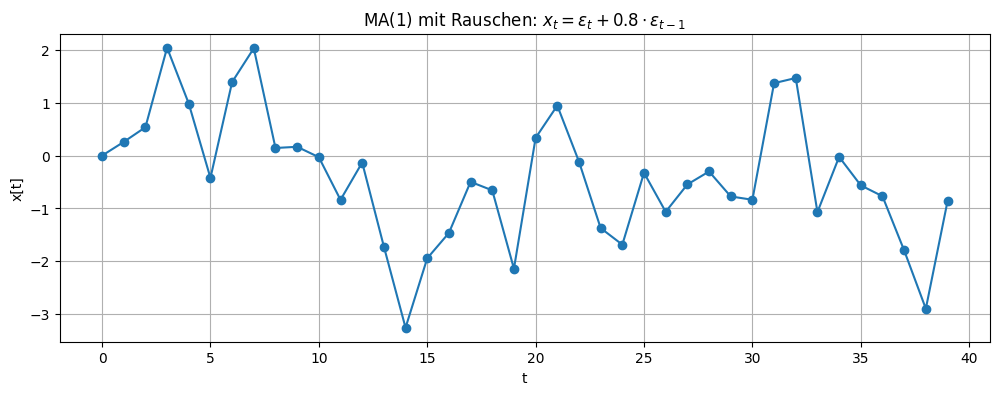

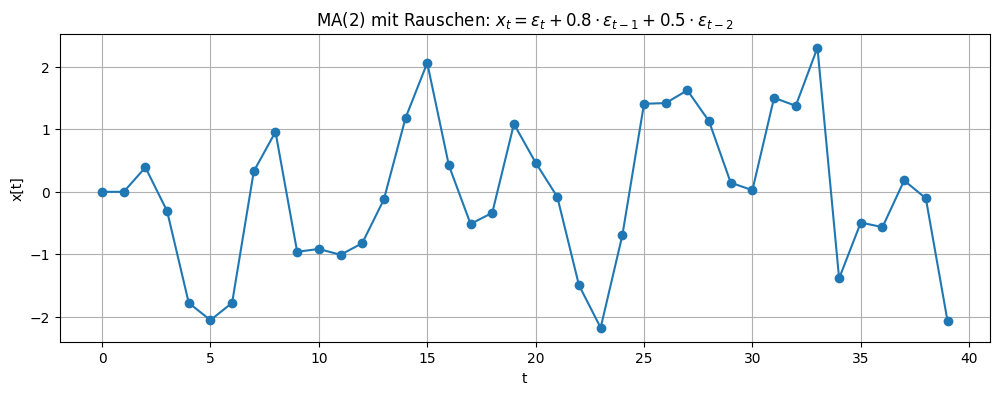

In [3]:
# MA(1) und MA(2) mit Rauschen (erneut generieren für aktuelle Session)
np.random.seed(42)
length = 40

# MA(1): x_t = ε_t + θ * ε_{t-1}
ma1_noise = generate_ma1_noise(length, theta=0.8, sigma=1.0)

# MA(2): x_t = ε_t + θ1 * ε_{t-1} + θ2 * ε_{t-2}
ma2_noise = generate_ma2_noise(length, theta1=0.8, theta2=0.5, sigma=1.0)

# Plot MA(1) mit Rauschen
plt.figure(figsize=(12, 4))
plt.plot(ma1_noise, marker='o')
plt.title("MA(1) mit Rauschen: $x_t = \\varepsilon_t + 0.8 \\cdot \\varepsilon_{t-1}$")
plt.xlabel("t")
plt.ylabel("x[t]")
plt.grid(True)
plt.show()

# Plot MA(2) mit Rauschen
plt.figure(figsize=(12, 4))
plt.plot(ma2_noise, marker='o')
plt.title("MA(2) mit Rauschen: $x_t = \\varepsilon_t + 0.8 \\cdot \\varepsilon_{t-1} + 0.5 \\cdot \\varepsilon_{t-2}$")
plt.xlabel("t")
plt.ylabel("x[t]")
plt.grid(True)
plt.show()
